In [156]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm
#from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
#from matplotlib.patches import Ellipse
from matplotlib.cm import ScalarMappable
#from matplotlib.patheffects import withStroke
#import matplotlib.ticker as ticker

#import math
#import csv
#from math import pi
#import pandas as pd
#import glob
#import match 

#import seaborn as sns
#import statistics as stat

from scipy.ndimage import gaussian_filter1d
from scipy.signal import correlate
from scipy.signal import find_peaks
#from scipy.stats import kde #for the plot very soft
#from scipy.stats import gaussian_kde
#from sklearn.neighbors import KernelDensity

from astropy.io import fits
from astropy.table import Table, unique, join, vstack, QTable, hstack
#from astropy.visualization import astropy_mpl_style
#from astropy.visualization import simple_norm
#from astropy.visualization import make_lupton_rgb
#from astropy.visualization import SqrtStretch
#from astropy.visualization import ZScaleInterval

from astropy.stats import biweight_location, biweight_scale
#from astropy.nddata import Cutout2D
from astropy import units as u
from astropy import constants as Cons
from astropy.wcs import WCS
import astropy.cosmology.units as cu
from astropy.cosmology import WMAP9, LambdaCDM, FlatLambdaCDM
from astropy.coordinates import SkyCoord, Galactic, Angle
#
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 3

In [157]:
names = [
    'extension', 'chip', 'X', 'Y', 'chi', 'SN', 'obj_sharpness', 'obj_roundness', 'd_Maxis', 'crowding', 
    'obj_type', 'counts_ACS_F606W', 'SkyLvl_ACS_F606W', 'norm_count_rate_ACS_F606W', 'norm_count_rate_uncert_ACS_F606W', 
    'VEGAMAG_ACS_F606W', 'UBVRI_ACS_F606W', 'mag_uncert_ACS_F606W', 'chi_ACS_F606W', 'SN_ACS_F606W', 
    'sharpness_ACS_F606W', 'roundness_ACS_F606W', 'crowding_ACS_F606W', 'phot_quality_flag_ACS_F606W', 
    'counts_ACS_F814W', 'SkyLvl_ACS_F814W', 'norm_count_rate_ACS_F814W', 'norm_count_rate_uncert_ACS_F814W', 
    'VEGAMAG_ACS_F814W', 'UBVRI_ACS_F814W', 'mag_uncert_ACS_F814W', 'chi_ACS_F814W', 'SN_ACS_F814W', 
    'sharpness_ACS_F814W', 'roundness_ACS_F814W', 'crowding_ACS_F814W', 'phot_quality_flag_ACS_F814W', 
    'counts_F606W_j9ec41afq_flc_chip1', 'SkyLvl_F606W_j9ec41afq_flc_chip1', 'norm_count_rate_F606W_j9ec41afq_flc_chip1', 
    'norm_count_rate_uncert_F606W_j9ec41afq_flc_chip1', 'VEGAMAG_F606W_j9ec41afq_flc_chip1', 'UBVRI_F606W_j9ec41afq_flc_chip1', 
    'mag_uncert_F606W_j9ec41afq_flc_chip1', 'chi_F606W_j9ec41afq_flc_chip1', 'SN_F606W_j9ec41afq_flc_chip1', 
    'sharpness_F606W_j9ec41afq_flc_chip1', 'roundness_F606W_j9ec41afq_flc_chip1', 'crowding_F606W_j9ec41afq_flc_chip1', 
    'phot_quality_flag_F606W_j9ec41afq_flc_chip1', 'counts_F606W_j9ec41afq_flc_chip2', 'SkyLvl_F606W_j9ec41afq_flc_chip2', 
    'norm_count_rate_F606W_j9ec41afq_flc_chip2', 'norm_count_rate_uncert_F606W_j9ec41afq_flc_chip2', 'VEGAMAG_F606W_j9ec41afq_flc_chip2', 
    'UBVRI_F606W_j9ec41afq_flc_chip2', 'mag_uncert_F606W_j9ec41afq_flc_chip2', 'chi_F606W_j9ec41afq_flc_chip2', 
    'SN_F606W_j9ec41afq_flc_chip2', 'sharpness_F606W_j9ec41afq_flc_chip2', 'roundness_F606W_j9ec41afq_flc_chip2', 
    'crowding_F606W_j9ec41afq_flc_chip2', 'phot_quality_flag_F606W_j9ec41afq_flc_chip2', 'counts_F606W_j9ec41agq_flc_chip1', 
    'SkyLvl_F606W_j9ec41agq_flc_chip1', 'norm_count_rate_F606W_j9ec41agq_flc_chip1', 'norm_count_rate_uncert_F606W_j9ec41agq_flc_chip1', 
    'VEGAMAG_F606W_j9ec41agq_flc_chip1', 'UBVRI_F606W_j9ec41agq_flc_chip1', 'mag_uncert_F606W_j9ec41agq_flc_chip1', 
    'chi_F606W_j9ec41agq_flc_chip1', 'SN_F606W_j9ec41agq_flc_chip1', 'sharpness_F606W_j9ec41agq_flc_chip1', 
    'roundness_F606W_j9ec41agq_flc_chip1', 'crowding_F606W_j9ec41agq_flc_chip1', 'phot_quality_flag_F606W_j9ec41agq_flc_chip1', 
    'counts_F606W_j9ec41agq_flc_chip2', 'SkyLvl_F606W_j9ec41agq_flc_chip2', 'norm_count_rate_F606W_j9ec41agq_flc_chip2', 
    'norm_count_rate_uncert_F606W_j9ec41agq_flc_chip2', 'VEGAMAG_F606W_j9ec41agq_flc_chip2', 'UBVRI_F606W_j9ec41agq_flc_chip2', 
    'mag_uncert_F606W_j9ec41agq_flc_chip2', 'chi_F606W_j9ec41agq_flc_chip2', 'SN_F606W_j9ec41agq_flc_chip2', 
    'sharpness_F606W_j9ec41agq_flc_chip2', 'roundness_F606W_j9ec41agq_flc_chip2', 'crowding_F606W_j9ec41agq_flc_chip2', 
    'phot_quality_flag_F606W_j9ec41agq_flc_chip2', 'counts_F814W_j9ec41aiq_flc_chip1', 'SkyLvl_F814W_j9ec41aiq_flc_chip1', 
    'norm_count_rate_F814W_j9ec41aiq_flc_chip1', 'norm_count_rate_uncert_F814W_j9ec41aiq_flc_chip1', 'VEGAMAG_F814W_j9ec41aiq_flc_chip1', 
    'UBVRI_F814W_j9ec41aiq_flc_chip1', 'mag_uncert_F814W_j9ec41aiq_flc_chip1', 'chi_F814W_j9ec41aiq_flc_chip1', 
    'SN_F814W_j9ec41aiq_flc_chip1', 'sharpness_F814W_j9ec41aiq_flc_chip1', 'roundness_F814W_j9ec41aiq_flc_chip1', 
    'crowding_F814W_j9ec41aiq_flc_chip1', 'phot_quality_flag_F814W_j9ec41aiq_flc_chip1', 'counts_F814W_j9ec41aiq_flc_chip2', 
    'SkyLvl_F814W_j9ec41aiq_flc_chip2', 'norm_count_rate_F814W_j9ec41aiq_flc_chip2', 'norm_count_rate_uncert_F814W_j9ec41aiq_flc_chip2', 
    'VEGAMAG_F814W_j9ec41aiq_flc_chip2', 'UBVRI_F814W_j9ec41aiq_flc_chip2', 'mag_uncert_F814W_j9ec41aiq_flc_chip2', 
    'chi_F814W_j9ec41aiq_flc_chip2', 'SN_F814W_j9ec41aiq_flc_chip2', 'sharpness_F814W_j9ec41aiq_flc_chip2', 
    'roundness_F814W_j9ec41aiq_flc_chip2', 'crowding_F814W_j9ec41aiq_flc_chip2', 'phot_quality_flag_F814W_j9ec41aiq_flc_chip2', 
    'counts_F814W_j9ec41akq_flc_chip1', 'SkyLvl_F814W_j9ec41akq_flc_chip1', 'norm_count_rate_F814W_j9ec41akq_flc_chip1', 
    'norm_count_rate_uncert_F814W_j9ec41akq_flc_chip1', 'VEGAMAG_F814W_j9ec41akq_flc_chip1', 'UBVRI_F814W_j9ec41akq_flc_chip1', 
    'mag_uncert_F814W_j9ec41akq_flc_chip1', 'chi_F814W_j9ec41akq_flc_chip1', 'SN_F814W_j9ec41akq_flc_chip1', 
    'sharpness_F814W_j9ec41akq_flc_chip1', 'roundness_F814W_j9ec41akq_flc_chip1', 'crowding_F814W_j9ec41akq_flc_chip1', 
    'phot_quality_flag_F814W_j9ec41akq_flc_chip1', 'counts_F814W_j9ec41akq_flc_chip2', 'SkyLvl_F814W_j9ec41akq_flc_chip2', 
    'norm_count_rate_F814W_j9ec41akq_flc_chip2', 'norm_count_rate_uncert_F814W_j9ec41akq_flc_chip2', 'VEGAMAG_F814W_j9ec41akq_flc_chip2', 
    'UBVRI_F814W_j9ec41akq_flc_chip2', 'mag_uncert_F814W_j9ec41akq_flc_chip2', 'chi_F814W_j9ec41akq_flc_chip2', 
    'SN_F814W_j9ec41akq_flc_chip2', 'sharpness_F814W_j9ec41akq_flc_chip2', 'roundness_F814W_j9ec41akq_flc_chip2', 
    'crowding_F814W_j9ec41akq_flc_chip2', 'phot_quality_flag_F814W_j9ec41akq_flc_chip2'
]

In [158]:
filename = 'data_fits/hlsp_angst_hst_acs-wfc_10523-ngc3031-halo-1_f814w_v1_ref.fits'

In [159]:
#t = Table.read(filename, format='fits')
#hdu = fits.open(filename)

t = np.loadtxt(filename)
t.shape #casi 41,963 fuentes con 141 columnas cada una
T = Table(t)
T.rename_columns(T.colnames,names)

#### Culls
##### Radburn-Smith et al. 2011  https://iopscience.iop.org/article/10.1088/0067-0049/195/2/18/pdf

In [160]:
T = T[T['obj_type']==1]
T = T[T['crowding_ACS_F606W']<=2]

T = T[T['crowding_ACS_F606W']+T['crowding_ACS_F814W']<0.16]
T = T[((T['sharpness_ACS_F606W']+T['sharpness_ACS_F814W'])>-0.06) & ((T['sharpness_ACS_F606W']+T['sharpness_ACS_F814W']) < 1.30)]
T = T[(T['SN_ACS_F606W']>5.0) & (T['SN_ACS_F814W']>5.0)]

#### Corregir por extinction galactica
$R_V = \frac{A_V}{E(B-V)}$

$R_{filter} = \frac{A_{filter}}{E(B-V)}$
##### Monachesi+2016: https://ui.adsabs.harvard.edu/abs/2016MNRAS.457.1419M/abstract
##### Schafly & Finkbeiner 2011 : https://ui.adsabs.harvard.edu/abs/2011ApJ...737..103S/abstract

In [161]:
def Extintion_corr(m, A):
    m_ = m - A
    return m_

In [162]:
Av_SF = 0.19  #Monachesi+2016
Rv = 3.1      #
R_606 = 2.471
R_814 = 1.526

A_606 = R_606*(Av_SF/Rv)
A_814 = R_814*(Av_SF/Rv)

T['F606W_'] = Extintion_corr(T['VEGAMAG_ACS_F606W'], A_606)
T['F814W_'] = Extintion_corr(T['VEGAMAG_ACS_F814W'], A_814)

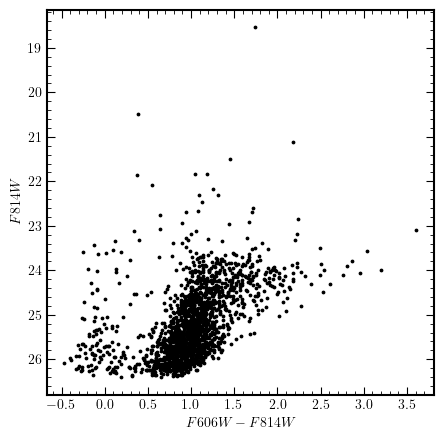

In [165]:
fig, ax = plt.subplots(1,1, figsize=(5,5)) 

ax.scatter(T['F606W_']-T['F814W_'], T['F814W_'], s=3, color='black', alpha=1)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel(r'$F606W-F814W$')
ax.set_ylabel(r'$F814W$')
ax.minorticks_on()
ax.tick_params(axis='x', which='both', top=True, direction='in')
ax.tick_params(axis='y', which='both', right=True, direction='in')
#plt.tight_layout()
#plt.savefig('CMD.jpg')

Steps Explanation

    CMD Plot: We plot F606W_ - F814W_ vs F814W_ and add a horizontal line at the peak value detected from the edge detection response.
    Smoothed LF Plot: We create a histogram of the F814W_ data and smooth it using a Gaussian filter. We then plot this smoothed histogram and add a horizontal line at the peak value.
    Edge Detection Response Plot: We compute the gradient of the smoothed histogram to detect edges and then smooth this gradient using a Gaussian filter. We plot this edge detection response and add a horizontal line at the peak value.

The peak value represents the "precise value at which stars suddenly increase in number," which corresponds to the tip of the red giant branch. The horizontal lines across all subplots help in identifying this value across different representations.


Otra cosa que se pude hacer es: 

logarithmic luminosity function for all stars with $0.3 \leq V-I\leq 1.5$. The upper red giant branch power law is quite obvious and has a clear break. Both the maximum likelihood model and the modified Sobel edge detector agree on the location of the break

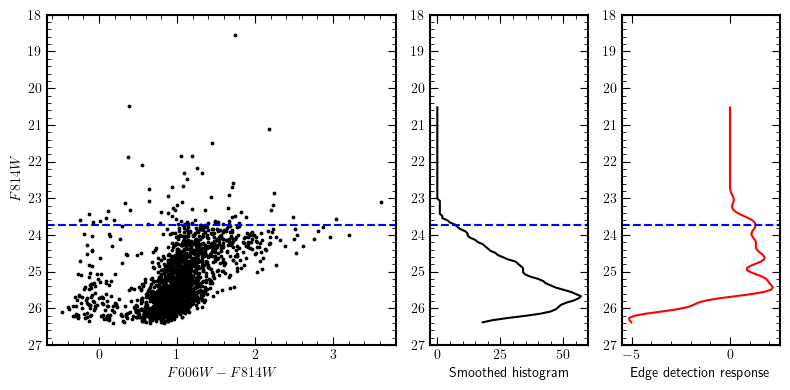

In [171]:
T_ = T[((T['F606W_']-T['F814W_'])>0.3) & ((T['F606W_']-T['F814W_'])<1.6)]
F606W_data = T_['F606W_']
F814W_data = T_['F814W_']
color_data = F606W_data - F814W_data

hist, bin_edges = np.histogram(F814W_data, bins=100)       # Creating the smoothed luminosity fun

smoothed_hist = gaussian_filter1d(hist, sigma=2)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2         # Find the bin centers

# Creating the edge detection response
gradient = np.gradient(smoothed_hist)
matched_filter_response = gaussian_filter1d(gradient, sigma=2)

peaks, _ = find_peaks(matched_filter_response)             # Finding peaks using find_peaks
if len(peaks) < 2:
    raise ValueError("Not enough peaks found in the edge detection response to identify a second peak.")

sorted_peaks = sorted(peaks, key=lambda x: bin_centers[x]) # Selecting the second peak based on the magnitude value (F814W)
second_peak_index = sorted_peaks[1]
TRGB_mag = bin_centers[second_peak_index]


fig = plt.figure(figsize=(8, 4))
# First subplot (CMD)
ax1 = plt.subplot(1, 4, (1,2))
ax1.scatter(T['F606W_']-T['F814W_'], T['F814W_'], s=3, color='black', alpha=1)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_xlabel(r'$F606W-F814W$')
ax1.set_ylabel(r'$F814W$')
ax1.minorticks_on()
ax1.tick_params(axis='x', which='both', top=True, direction='in')
ax1.tick_params(axis='y', which='both', right=True, direction='in')
ax1.axhline(y=TRGB_mag, color='blue', linestyle='--')
ax1.set_ylim(27,18)

# Second subplot (Smoothed histogram)
ax2 = plt.subplot(1, 4, 3)
ax2.plot(smoothed_hist, bin_centers, color='black')
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_xlabel('Smoothed histogram')
ax2.axhline(y=TRGB_mag, color='blue', linestyle='--')
ax2.set_ylabel('')
ax2.minorticks_on()
ax2.tick_params(axis='x', which='both', top=True, direction='in')
ax2.tick_params(axis='y', which='both', right=True, direction='in')
ax2.set_ylim(27,18)

# Third subplot (E.D. response)
ax3 = plt.subplot(1, 4, 4)
ax3.plot(matched_filter_response, bin_centers, color='red')
ax3.set_ylim(ax3.get_ylim()[::-1])
ax3.set_xlabel('Edge detection response')
ax3.minorticks_on()
ax3.tick_params(axis='x', which='major', top=True, direction='in')
ax3.tick_params(axis='y', which='both', right=True, direction='in')
ax3.set_ylim(27,18)
ax3.axhline(y=TRGB_mag, color='blue', linestyle='--')

plt.tight_layout()
#plt.show()
#plt.savefig('CMD_TRGB.jpg')

#### From eq (6) de Radburn-Smith 2011

$M_{F814W} = -4.06 + 0.20 [(F606W - F814W)-1.213$

Con $F606W - F814W = 1.2$

Calculamos el la distancia a la galaxia, a partir del modulo de distancia:
$d=10^{\frac{(m-M)+5}{5}}$



In [175]:
TRGB_color = 1.2

TRGB_MF814W = -4.06 + 0.20*(TRGB_color - 1.213)

TRGB_distance = (10**((TRGB_mag-TRGB_MF814W+5)/5))*u.pc
TRGB_distance.to(u.Mpc)

<Quantity 3.60129082 Mpc>

#### Obtener el $t_j$ a partir de lo visto en clases
##### Para estimar la estimar el tj (tiempo de duraci ́on en esa fase evolutiva) se seleccion ́o una regi ́on circular en post-MS y las expresiones vistas en clase. Primero, la luminosidad total muestreada dentro de un frame con un field of view dado, se puede expresar como:
$L_T = BC_{\lambda} FoV 10^{−0.4(\mu_{\lambda}−A_{\lambda}−mod−M_{\lambda , \odot}})$

##### donde $BC_{lambda} = 1.2$ es la corrección bolométrica, $FoV = 202 × 202 = 40804$ es el field of view $\mu_{\lambda} = 26.5 mag/arcsec2$ es el brillo superficial, $A_{\lambda} = 1.526$ es la extincion, $mod = m − M = 27.766$ es el modulo de distancia y $M_{\lambda}= 4.81$ es el magnitud absoluta del Sol. Entonces:
$LT = 1.2 × 40804 × 10−0.4(26.5−1.526−27.766−4.81) = 5.378 × 107$

In [176]:
#i_names = ['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4',
#           'pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Umag','Bmag','Vmag','Rmag','Imag','Jmag','Hmag','Kmag']

i_names = ['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4',
           'pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','F435Wmag','F475Wmag','F555Wmag','F606Wmag','F625Wmag','F775Wmag','F814Wmag']

iso = Table.read('isocronas.dat', format='ascii')
iso.rename_columns(iso.colnames,i_names)

In [177]:
#A_606_V = 0.90328
#A_814_V = 59696
#E_606 = (A_606_V/Av_SF)/Rv
#E_814 = (A_814_V/Av_SF)/Rv
#
#A_606_ = R_606*(E_606)
#A_814_ = R_814*(E_814)
#
#iso['F814W_'] = Extintion_corr(iso['F814Wmag'], A_814_)
#iso['F606W_'] = Extintion_corr(iso['F606Wmag'], A_606_)

####  CMD en M

In [178]:
TRGB_distance.value

3601290.8165190117

In [179]:
def m_distance_modulus(M, d):
    m = M + 5*np.log10(d/10)
    return m

def M_distance_modulus(m,d):
    M = m - 5*np.log10(d/10)

In [180]:
T['M_F606W'] = M_distance_modulus(T['F606W_'], TRGB_distance.value)
T['M_F814W'] = M_distance_modulus(T['F814W_'], TRGB_distance.value)

iso['m_F814W'] = m_distance_modulus(iso['F814Wmag'], TRGB_distance.value)
iso['m_F606W'] = m_distance_modulus(iso['F606Wmag'], TRGB_distance.value)

In [181]:
iso_8e9 = iso[iso['logAge']==9.90309]
iso_9e9 = iso[iso['logAge']==9.95424]
iso_10e9 = iso[iso['logAge']==10.0]
iso_11e9 = iso[iso['logAge']==10.04139]
iso_12e9 = iso[iso['logAge']==10.07918]

In [182]:
i_m1 = iso_10e9[iso_10e9['MH']== -0.5 ]
i_m2 = iso_10e9[iso_10e9['MH']== -1 ]
i_m3 = iso_10e9[iso_10e9['MH']== -1.5 ]
i_m4 = iso_10e9[iso_10e9['MH']== -2 ]
i_m5 = iso_10e9[iso_10e9['MH']== -2.19174 ]

In [183]:
iso_8e9_ = iso_8e9[iso_8e9['MH']== -1.5]
iso_9e9_ = iso_9e9[iso_9e9['MH']== -1.5]
iso_10e9_ = iso_10e9[iso_10e9['MH']== -1.5]
iso_11e9_ = iso_11e9[iso_11e9['MH']== -1.5]
iso_12e9_ = iso_12e9[iso_12e9['MH']== -1.5]

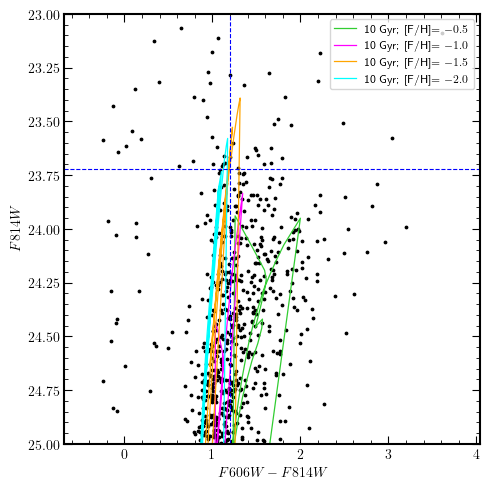

In [195]:
fig, ax = plt.subplots(1,1, figsize=(5,5)) 

ax.scatter(T['F606W_']-T['F814W_'], T['F814W_'], s=3, color='black', alpha=1)

ax.plot(i_m1['m_F606W']-i_m1['m_F814W'], i_m1['m_F814W'], c='limegreen', lw=0.9, label=r'10 Gyr; [F/H]$=-0.5$')
ax.plot(i_m2['m_F606W']-i_m2['m_F814W'], i_m2['m_F814W'], c='magenta', lw=0.9, label=r'10 Gyr; [F/H]$=-1.0$')
ax.plot(i_m3['m_F606W']-i_m3['m_F814W'], i_m3['m_F814W'], c='orange', lw=0.9, label=r'10 Gyr; [F/H]$=-1.5$')
ax.plot(i_m4['m_F606W']-i_m4['m_F814W'], i_m4['m_F814W'], c='cyan', lw=0.9, label=r'10 Gyr; [F/H]$=-2.0$')

#ax.scatter(i_m1['m_F606W']-i_m1['m_F814W'], i_m1['m_F814W'], s=8, fc='limegreen', ec='black', lw=0.3, label=r'10 Gyr; [F/H]$=-0.5$')
#ax.scatter(i_m2['m_F606W']-i_m2['m_F814W'], i_m2['m_F814W'], s=8, fc='magenta', ec='black', lw=0.3, label=r'10 Gyr; [F/H]$=-1.0$')
#ax.scatter(i_m3['m_F606W']-i_m3['m_F814W'], i_m3['m_F814W'], s=8, fc='orange', ec='black', lw=0.3, label=r'10 Gyr; [F/H]$=-1.5$')
#ax.scatter(i_m4['m_F606W']-i_m4['m_F814W'], i_m4['m_F814W'], s=8, fc='cyan', ec='black', lw=0.3, label=r'10 Gyr; [F/H]$=-2.0$')

ax.axhline(y=TRGB_mag, color='blue', linestyle='--', lw=0.8)
ax.axvline(x=TRGB_color, color='blue', linestyle='--', lw=0.8)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel(r'$F606W-F814W$')
ax.set_ylabel(r'$F814W$')
ax.minorticks_on()
ax.tick_params(axis='x', which='both', top=True, direction='in')
ax.tick_params(axis='y', which='both', right=True, direction='in')
#ax.set_ylim(26.5,21)
ax.set_ylim(25,23)

ax.legend(fontsize=8, loc=1)
plt.tight_layout()

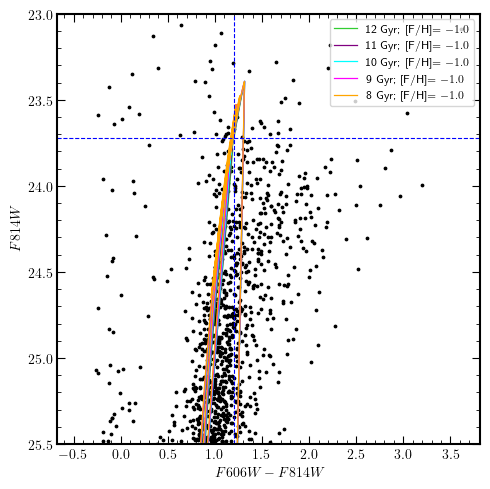

In [194]:
fig, ax = plt.subplots(1,1, figsize=(5,5)) 

ax.scatter(T['F606W_']-T['F814W_'], T['F814W_'], s=3, color='black', alpha=1)

ax.plot(iso_12e9_['m_F606W']-iso_12e9_['m_F814W'], iso_12e9_['m_F814W'], c='limegreen', lw=0.9, label=r'12 Gyr; [F/H]$=-1.0$')
ax.plot(iso_11e9_['m_F606W']-iso_11e9_['m_F814W'], iso_11e9_['m_F814W'], c='purple', lw=0.9, label=r'11 Gyr; [F/H]$=-1.0$')
ax.plot(iso_10e9_['m_F606W']-iso_10e9_['m_F814W'], iso_10e9_['m_F814W'], c='cyan', lw=0.9, label=r'10 Gyr; [F/H]$=-1.0$')
ax.plot(iso_9e9_['m_F606W']-iso_9e9_['m_F814W'], iso_9e9_['m_F814W'], c='magenta', lw=0.9, label=r'9 Gyr; [F/H]$=-1.0$')
ax.plot(iso_8e9_['m_F606W']-iso_8e9_['m_F814W'], iso_8e9_['m_F814W'], c='orange', lw=0.9, label=r'8 Gyr; [F/H]$=-1.0$')

ax.axhline(y=TRGB_mag, color='blue', linestyle='--', lw=0.8)
ax.axvline(x=TRGB_color, color='blue', linestyle='--', lw=0.8)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel(r'$F606W-F814W$')
ax.set_ylabel(r'$F814W$')
ax.minorticks_on()
ax.tick_params(axis='x', which='both', top=True, direction='in')
ax.tick_params(axis='y', which='both', right=True, direction='in')
#ax.set_ylim(27,22)
ax.set_ylim(25.5,23)

ax.legend(fontsize=8, loc=1)
plt.tight_layout()

In [204]:
y1 = 23.5
y2 = 25.5
dy = y2-y1

x1 = 0.8
x2 = 1.35
dx= x2-x1

In [207]:
dy

2.0

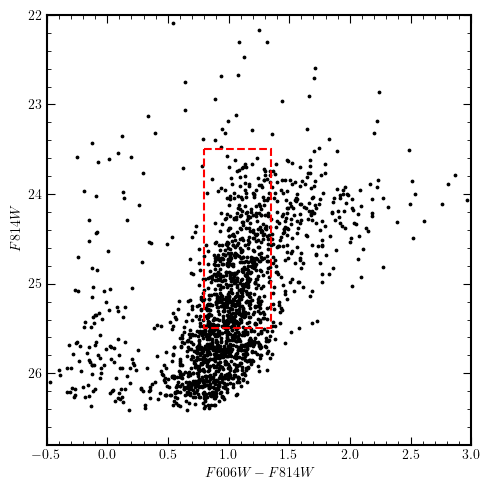

In [215]:
import matplotlib.patches as patches

fig, ax = plt.subplots(1,1, figsize=(5,5)) 

ax.scatter(T['F606W_']-T['F814W_'], T['F814W_'], s=3, color='black', alpha=1)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel(r'$F606W-F814W$')
ax.set_ylabel(r'$F814W$')
ax.minorticks_on()
ax.tick_params(axis='x', which='both', top=True, direction='in')
ax.tick_params(axis='y', which='both', right=True, direction='in')
ax.set_ylim(26.8,22)
ax.set_xlim(-0.5, 3.0)

rect = patches.Rectangle((x1, y1), dx, y2-y1, linewidth=1.5, edgecolor='red', facecolor='none', linestyle='--')
ax.add_patch(rect)

plt.tight_layout()

plt.